In [19]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from segmentation_models import Unet
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import cv2
import matplotlib.pyplot as plt
from glob import glob

Segmentation Models: using `tf.keras` framework.


In [2]:
def unet_model(input_size=(128, 128, 3)):
    inputs = layers.Input(input_size)
    
    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.BatchNormalization()(c1)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    c1 = layers.BatchNormalization()(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)
    p1 = layers.Dropout(0.1)(p1)
    
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.BatchNormalization()(c2)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    c2 = layers.BatchNormalization()(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)
    p2 = layers.Dropout(0.1)(p2)
    
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.BatchNormalization()(c3)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    c3 = layers.BatchNormalization()(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)
    p3 = layers.Dropout(0.2)(p3)
    
    # Bottleneck
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.BatchNormalization()(c4)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    c4 = layers.BatchNormalization()(c4)
    
    # Decoder
    u1 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c4)
    u1 = layers.concatenate([u1, c3])
    c5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u1)
    c5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c5)
    
    u2 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u2 = layers.concatenate([u2, c2])
    c6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u2)
    c6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c6)
    
    u3 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u3 = layers.concatenate([u3, c1])
    c7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u3)
    c7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c7)
    
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c7)
    
    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

In [3]:
def load_images(folder, img_size=(128, 128)):
    images = []
    for img_path in glob(os.path.join(folder, '*.tif')):
        img = cv2.imread(img_path)
        img = cv2.resize(img, img_size)
        img = img / 255.0
        images.append(img)
    return np.array(images)

In [4]:
def load_masks(folder, img_size=(128, 128)):
    masks = []
    for mask_path in glob(os.path.join(folder, '*.tif')):
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, img_size)
        mask = mask / 255.0
        masks.append(mask[..., np.newaxis])
    return np.array(masks)

In [5]:
train_images_path = 'inria/AerialImageDataset/train/images'
train_masks_path = 'inria/AerialImageDataset/train/gt'
test_images_path = 'inria/AerialImageDataset/test/images'

In [6]:
train_images = load_images(train_images_path)
train_masks = load_masks(train_masks_path)
test_images = load_images(test_images_path)

In [15]:
input_size = (128, 128, 3)
model = Unet('resnet34', input_shape=(128, 128, 3), classes=1, activation='sigmoid')
#model = unet_model(input_size)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

NameError: name 'Unet' is not defined

In [16]:
history = model.fit(train_images, train_masks, epochs=10, batch_size=8, validation_split=0.2)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.8669 - loss: 0.3018 - val_accuracy: 0.8070 - val_loss: 0.6860
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.8705 - loss: 0.2918 - val_accuracy: 0.8070 - val_loss: 0.6772
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8724 - loss: 0.2904 - val_accuracy: 0.8070 - val_loss: 0.6178
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.8611 - loss: 0.3062 - val_accuracy: 0.8070 - val_loss: 0.8575
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.8755 - loss: 0.2823 - val_accuracy: 0.8070 - val_loss: 0.8170
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.8732 - loss: 0.2831 - val_accuracy: 0.8070 - val_loss: 0.8285
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.8732 - loss: 0.2818 - val_accuracy: 0.8070 - val_loss: 1.0141
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.8808 - loss: 0.2660 - val_accuracy: 0.8071 - val_loss:

In [13]:
def visualize_results(test_images, model):
    for i, img in enumerate(test_images[5:10]):
        pred_mask = model.predict(img[np.newaxis, ...])[0]
        pred_mask = (pred_mask > 0.5).astype(np.uint8)
        
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 3, 1)
        plt.title('Original Image')
        plt.imshow(img)
        plt.axis('off')
        
        plt.subplot(1, 3, 2)
        plt.title('Predicted Mask')
        plt.imshow(pred_mask[..., 0], cmap='gray')
        plt.axis('off')
        
        plt.subplot(1, 3, 3)
        plt.title('Overlay')
        plt.imshow(img)
        plt.imshow(pred_mask[..., 0], cmap='jet', alpha=0.5)
        plt.axis('off')
        
        plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


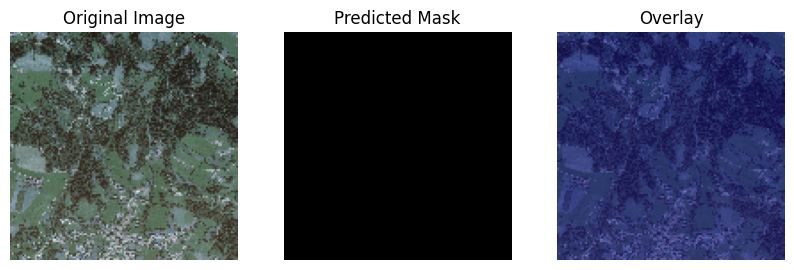

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


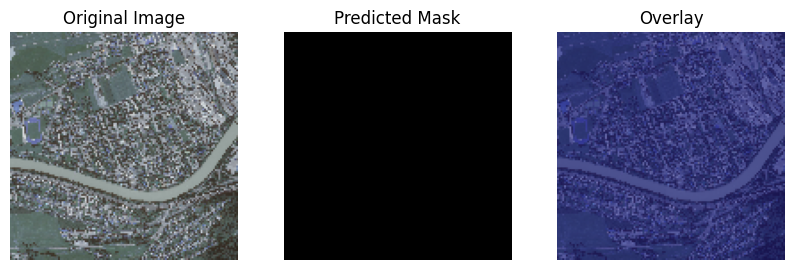

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


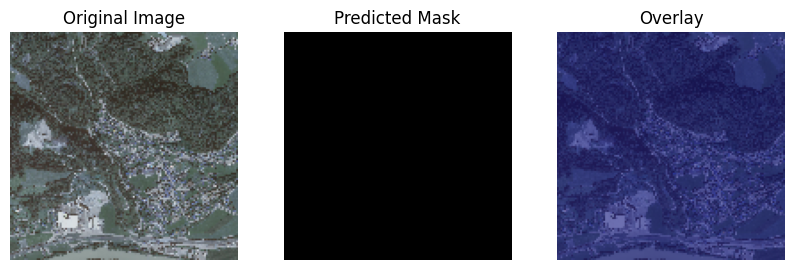

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


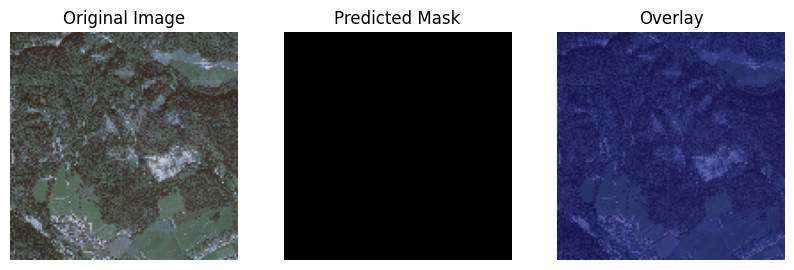

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


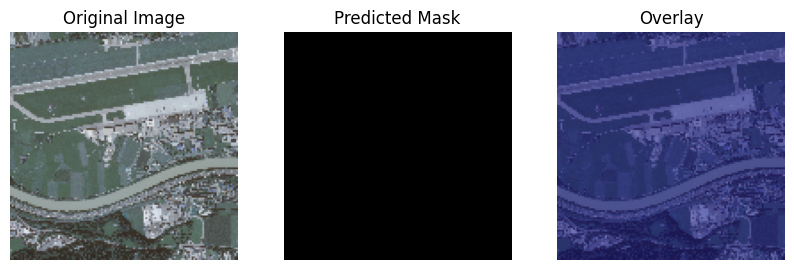

In [14]:
visualize_results(test_images, model)